In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import mne


In [2]:
eeg_files = sorted(glob.glob('./data/0114ssEEG/*.csv'))

In [3]:
eeg_files

['./data/0114ssEEG/SDS00001.csv',
 './data/0114ssEEG/SDS00002.csv',
 './data/0114ssEEG/SDS00003.csv',
 './data/0114ssEEG/SDS00004.csv',
 './data/0114ssEEG/SDS00005.csv',
 './data/0114ssEEG/SDS00006.csv',
 './data/0114ssEEG/SDS00007.csv',
 './data/0114ssEEG/SDS00008.csv',
 './data/0114ssEEG/SDS00009.csv',
 './data/0114ssEEG/SDS00010.csv',
 './data/0114ssEEG/SDS00011.csv',
 './data/0114ssEEG/SDS00012.csv',
 './data/0114ssEEG/SDS00013.csv']

In [4]:
all_eeg_df = [(os.path.basename(df_path).replace("SDS", "").replace(".csv", "").replace("000", ""), pd.read_csv(df_path, header=11)) for df_path in eeg_files]

In [5]:
for df in all_eeg_df:
    print(df[1].head())

   Second  Volt  Volt.1
0  0.0000  2.48    0.82
1  0.0002  2.48    0.80
2  0.0004  2.48    0.76
3  0.0006  2.48    0.76
4  0.0008  2.48    0.70
   Second  Volt  Volt.1
0   0.000  -3.2   -0.48
1   0.001   0.0   -1.36
2   0.002  -3.2   -0.96
3   0.003  -3.2    0.24
4   0.004   0.0    1.68
   Second   Volt  Volt.1
0   0.000 -0.288    1.60
1   0.001 -0.312   -1.44
2   0.002 -0.312   -1.40
3   0.003 -0.336   -0.28
4   0.004 -0.368    0.56
   Second   Volt  Volt.1
0   0.000 -0.208    0.28
1   0.001 -0.256   -0.68
2   0.002 -0.272   -1.68
3   0.003 -0.304    1.24
4   0.004 -0.336    1.48
   Second   Volt  Volt.1
0   0.000 -0.328   -1.12
1   0.001 -0.352    0.36
2   0.002 -0.320    0.88
3   0.003 -0.248    0.72
4   0.004 -0.232   -0.08
   Second   Volt  Volt.1
0   0.000 -0.360    0.76
1   0.001 -0.320   -1.04
2   0.002 -0.288   -1.28
3   0.003 -0.248   -0.76
4   0.004 -0.256    0.08
   Second   Volt  Volt.1
0   0.000 -0.288    1.04
1   0.001 -0.312   -1.32
2   0.002 -0.304   -1.28
3   0.003 -0

In [6]:
recording_length = 70
sampling_rate = int(len(all_eeg_df[0][1]) / recording_length )

In [7]:
sampling_rate

1000

- Reading data into MNE

Creating RawArray with float64 data, n_channels=2, n_times=70000
    Range : 0 ... 69999 =      0.000 ...    69.999 secs
Ready.


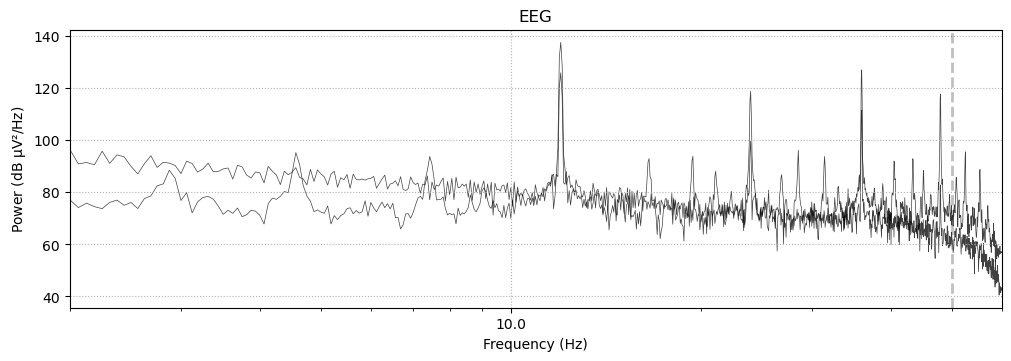

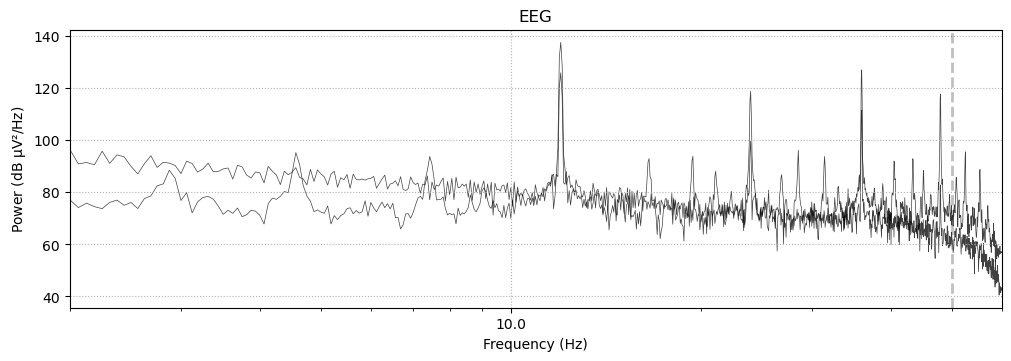

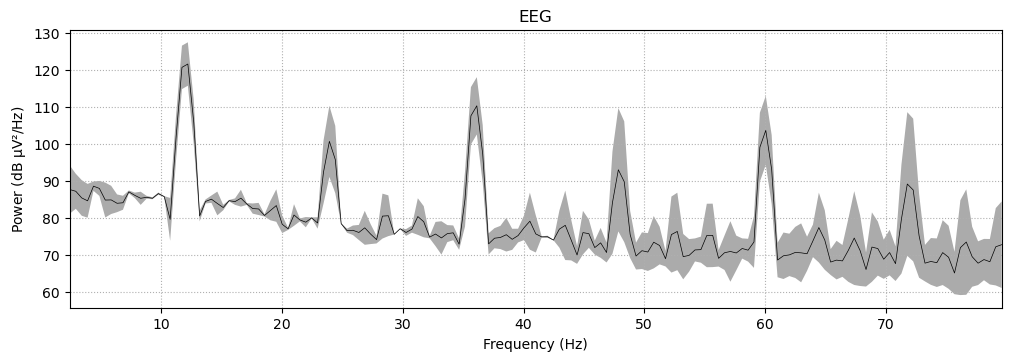

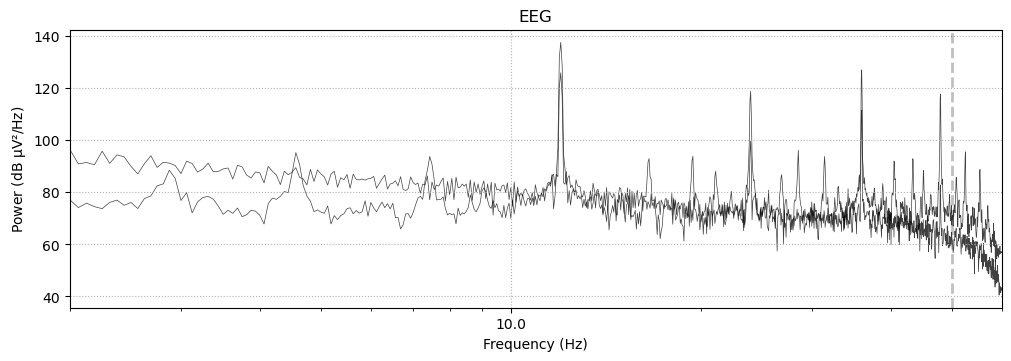

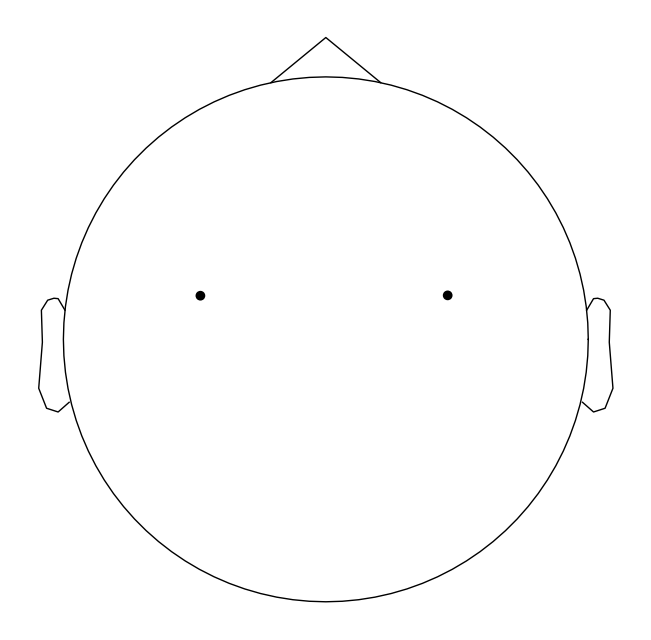

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband 

/home/riwata/Documents/projects/NIT_Lab/bin/conda/mne/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/home/riwata/Documents/projects/NIT_Lab/bin/conda/mne/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


In [16]:
index_to_mne = {}
for index, df in all_eeg_df:
    # Converting dataframe to Numpy array
    eeg_data = df.drop(columns=['Second'], errors='ignore').to_numpy().T  # Transpose to shape (n_channels, n_samples)
    # channel_names = df.columns[1:]
    channel_names = ["C3", "C4"]

    info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(eeg_data, info)
    

    # Load a standard montage
    montage = mne.channels.make_standard_montage('standard_1020')

    # Apply the montage to the raw object
    raw.set_montage(montage)

    # Plot sensor locations to confirm
    raw.plot_sensors(kind='topomap')



    raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

    # set notch filter to remove electrical noise
    raw.notch_filter(60)
    # only keeping frequencies between 1-50 Hz
    raw.filter(l_freq=1.0, h_freq=50.0) 
    
    # Downsample a lot
    raw.resample(128, npad='auto')

    raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=60, average=False, spatial_colors=True, xscale='log');
    # Notice that the max plotted frequency is 60, the nyquist rate!

    index_to_mne[index] = raw
    break




In [11]:
# import matplotlib.pyplot as plt

# for index, df in all_eeg_df:
#     # Set 'Time' column as the x-axis
#     time = df['Second']

#     # Create a figure and axis
#     fig, ax1 = plt.subplots(figsize=(12, 6))

#     # Plot the first channel on the left y-axis
#     channel_1 = df.columns[1]
#     ax1.plot(time, df[channel_1], label=channel_1, color='b', alpha=0.7)
#     ax1.set_ylabel(f'{channel_1} Amplitude (µV)', color='b')
#     ax1.tick_params(axis='y', labelcolor='b')
#     ax1.set_xlabel('Time (s)')
#     ax1.grid(True)

#     # Create a second y-axis for the second channel
#     ax2 = ax1.twinx()
#     channel_2 = df.columns[2]
#     ax2.plot(time, df[channel_2], label=channel_2, color='r', alpha=0.7)
#     ax2.set_ylabel(f'{channel_2} Amplitude (µV)', color='r')
#     ax2.tick_params(axis='y', labelcolor='r')

#     # Add a title and legend
#     plt.title(f'EEG Data {index}')
    
#     plt.xlim(10, 20)
    
#     fig.tight_layout()  # Adjust layout to prevent overlap



#     plt.show()

In [12]:
# for index, df in all_eeg_df:
#     # Set 'Time' column as the x-axis
#     time = df['Second']

#     # Plot each EEG channel
#     plt.figure(figsize=(12, 6))
#     for column in df.columns[1:]:  # Skip 'Time' column
#         plt.plot(time, df[column], label=column, alpha=0.5)

#     # Customize the plot
#     plt.title('EEG Data {}'.format(index))
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude (µV)')
#     plt.legend()
#     plt.grid(True)

#     # Show the plot
#     plt.show()

In [13]:
# # Set 'Time' column as the x-axis
# time = eeg_df['Second']

# # Plot each EEG channel
# plt.figure(figsize=(12, 6))
# for column in eeg_df.columns[1:]:  # Skip 'Time' column
#     plt.plot(time, eeg_df[column], label=column, alpha=0.5)

# # Customize the plot
# plt.title('EEG Data')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude (µV)')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()